Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
df_pandas = pd.DataFrame(np.random.randint(1, 101, size=1000000), columns=['random_numbers'])
end_time_pandas = time.time()

time_pandas = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
array_numpy = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()

time_numpy = end_time_numpy - start_time_numpy

#  NumPy is faster than Pandas because it directly operates on low-level memory and arrays, while Pandas provides more advanced features, resulting in additional overhead
print(f"Time spent using Pandas: {time_pandas:.6f} second")
print(f"Time spent using NumPy: {time_numpy:.6f} second")


Time spent using Pandas: 0.009001 second
Time spent using NumPy: 0.007034 second


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [31]:
import pandas as pd
import numpy as np
import time

# Step 1: Use Pandas to load the dataset and calculate the mean
start_time_pandas = time.time()


data_pandas = pd.read_csv('sleep_health.csv')

mean_sleep_duration = data_pandas['Sleep Duration'].mean()
mean_systolic_bp = data_pandas['Systolic blood pressure'].mean()
mean_diastolic_bp = data_pandas['Diastolic blood pressure'].mean()
mean_heart_rate = data_pandas['Heart Rate'].mean()
mean_daily_steps = data_pandas['Daily Steps'].mean()

end_time_pandas_means = time.time()

print(f"Pandas mean value:\nSleep duration: {mean_sleep_duration}\nSystolic pressure: {mean_systolic_bp}\nDiastolic blood pressure: {mean_diastolic_bp}\nHeart rate:{mean_heart_rate}\nDaily Steps:{mean_daily_steps}")

# Step 2: Using NumPy to load the dataset and calculate the mean
start_time_numpy = time.time()
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
mean_sleep_duration_np = np.mean(data['Sleep_Duration'])  
mean_systolic_bp_np = np.mean(data['Systolic_blood_pressure'])  
mean_diastolic_bp_np = np.mean(data['Diastolic_blood_pressure'])
mean_heart_rate_np = np.mean(data['Heart_Rate'])
mean_daily_steps_np = np.mean(data['Daily_Steps'])

end_time_numpy_means = time.time()
print(f"NumPy mean value:\nSleep duration: {mean_sleep_duration_np}\nSystolic pressure: {mean_systolic_bp_np}\nDiastolic blood pressure: {mean_diastolic_bp_np}\nHeart rate: {mean_heart_rate_np}\nDaily Steps: {mean_daily_steps_np}")

# Step 3: Using Pandas to Calculate Correlation

correlation_matrix = data_pandas.corr()

correlation_sleep_age = correlation_matrix['Sleep Duration']['Age']
correlation_sleep_heart_rate = correlation_matrix['Sleep Duration']['Heart Rate']
correlation_sleep_steps = correlation_matrix['Sleep Duration']['Daily Steps']

# Print the results
print(f"Using Pandas to Calculate Correlation:")
print(f"Correlation between Sleep Duration and Age: {correlation_sleep_age}")
print(f"Correlation between Sleep Duration and Heart Rate: {correlation_sleep_heart_rate}")
print(f"Correlation between Sleep Duration and Daily Steps: {correlation_sleep_steps}")

# Step4 : Using Numpy to Calculate Correlation
sleep_duration = data['Sleep_Duration']
age = data['Age']
heart_rate = data['Heart_Rate']
daily_steps = data['Daily_Steps']

combined_data = np.vstack((sleep_duration, age, heart_rate, daily_steps)).T
correlation_matrix = np.corrcoef(combined_data, rowvar=False)
correlation_sleep_age1 = correlation_matrix[0, 1]  # Correlation between Sleep Duration and Age
correlation_sleep_heart_rate1 = correlation_matrix[0, 2]  # Correlation between Sleep Duration and Heart Rate
correlation_sleep_steps1 = correlation_matrix[0, 3]  # Correlation between Sleep Duration and Daily Steps

# Print the results
print(f"Using Numpy to Calculate Correlation:")
print(f"Correlation between Sleep Duration and Age: {correlation_sleep_age1}")
print(f"Correlation between Sleep Duration and Heart Rate: {correlation_sleep_heart_rate1}")
print(f"Correlation between Sleep Duration and Daily Steps: {correlation_sleep_steps1}")
# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column

#Step 5: Use Pandas to calculate the standard deviation of 'Sleep Duration'
std_sleep_duration_pandas = data_pandas['Sleep Duration'].std()
print(f"Pandas Standard deviation of sleep duration: {std_sleep_duration_pandas}")
#Step 6: Use NumPy to calculate the standard deviation of 'Sleep Duration'
sleep_duration = data['Sleep_Duration'] 
std_sleep_duration_numpy = np.std(sleep_duration, ddof=1) 
print(f"NumPy Standard deviation of sleep duration: {std_sleep_duration_numpy}")

#Step 7: Compare the running time of Pandas and NumPy
# Timing the Pandas approach
start_time_pandas = time.time()

std_sleep_duration_pandas1 = data_pandas['Sleep Duration'].std()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

print(f"Pandas Standard Deviation: {std_sleep_duration_pandas1}")
print(f"Time taken by Pandas: {pandas_time:.6f} seconds")

# Timing the NumPy approach
start_time_numpy = time.time()

sleep_duration_numpy = data['Sleep_Duration']  # Use the correct field name

# Calculate the standard deviation using NumPy
std_sleep_duration_numpy1 = np.std(sleep_duration_numpy, ddof=1)  # Using ddof=1 for sample standard deviation

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f"NumPy Standard Deviation: {std_sleep_duration_numpy1}")
print(f"Time taken by NumPy: {numpy_time:.6f} seconds")
#for larger datasets, NumPy may edge out Pandas in speed due to its lower-level operations.





# Calculate the correlation in NumPy using np.corrcoef()

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]


# Use np-std() to calculate Standard deviation



Pandas mean value:
Sleep duration: 7.132085561497325
Systolic pressure: 128.55347593582889
Diastolic blood pressure: 84.64973262032086
Heart rate:70.16577540106952
Daily Steps:6816.844919786096
NumPy mean value:
Sleep duration: 7.132085561497325
Systolic pressure: 128.55347593582889
Diastolic blood pressure: 84.64973262032086
Heart rate: 70.16577540106952
Daily Steps: 6816.844919786096
Using Pandas to Calculate Correlation:
Correlation between Sleep Duration and Age: 0.3447093581647443
Correlation between Sleep Duration and Heart Rate: -0.516454888517144
Correlation between Sleep Duration and Daily Steps: -0.039532537675731685
Using Numpy to Calculate Correlation:
Correlation between Sleep Duration and Age: 0.34470935816474424
Correlation between Sleep Duration and Heart Rate: -0.5164548885171424
Correlation between Sleep Duration and Daily Steps: -0.039532537675732504
Pandas Standard deviation of sleep duration: 0.7956567308898189
NumPy Standard deviation of sleep duration: 0.79565673

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

C:\Users\HP\AppData\Local\Temp\ipykernel_8428\1059828894.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


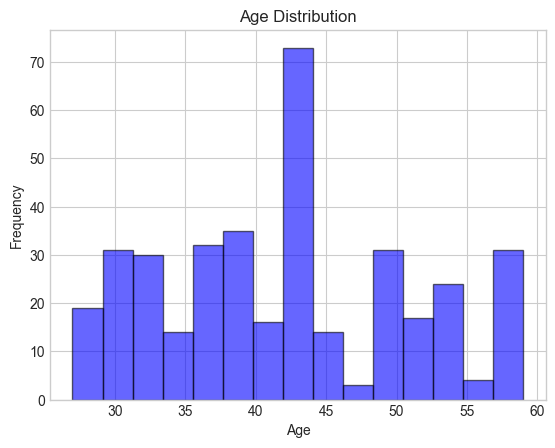

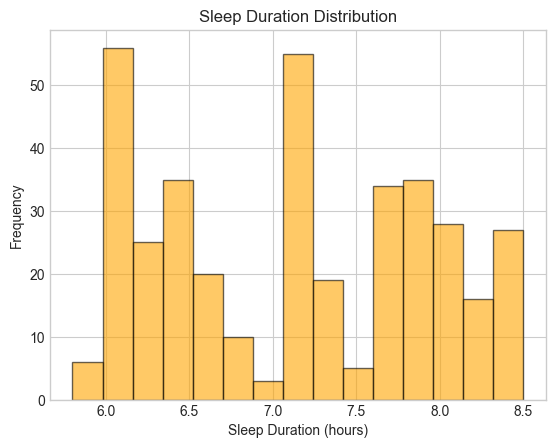

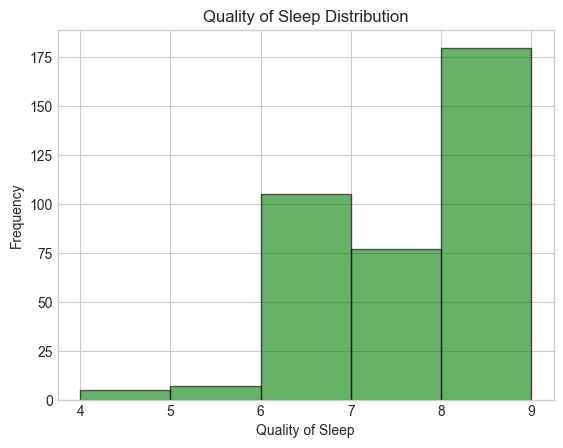

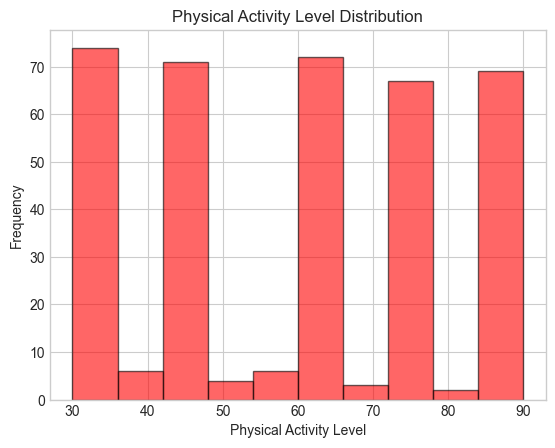

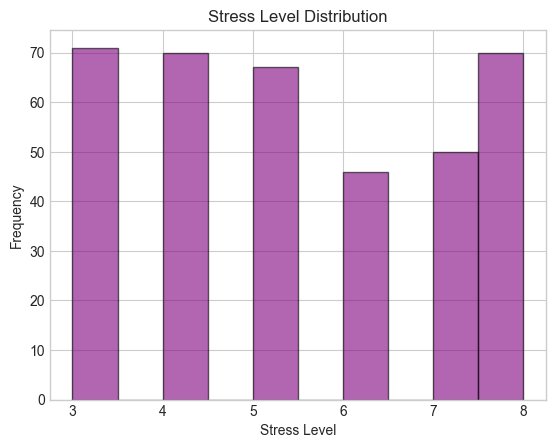

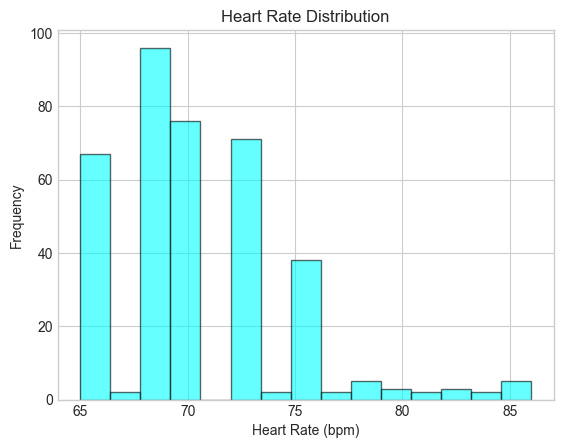

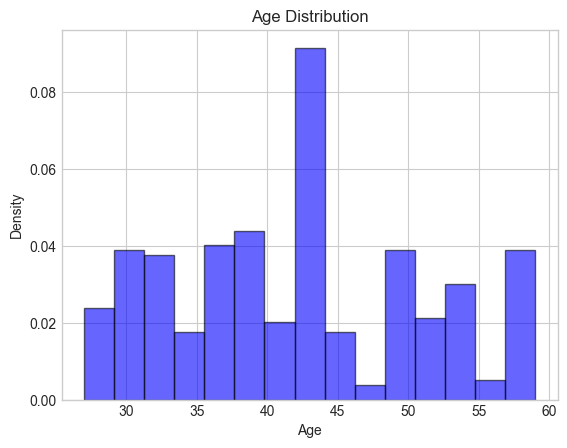

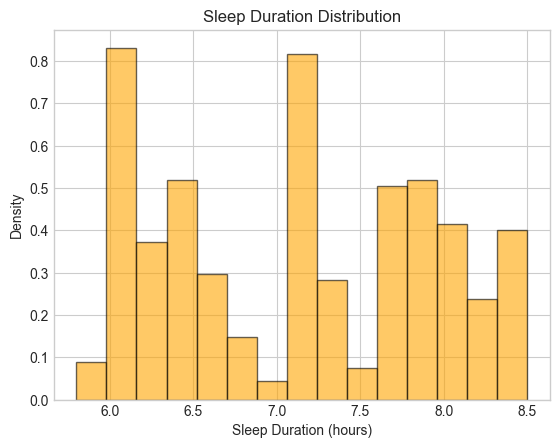

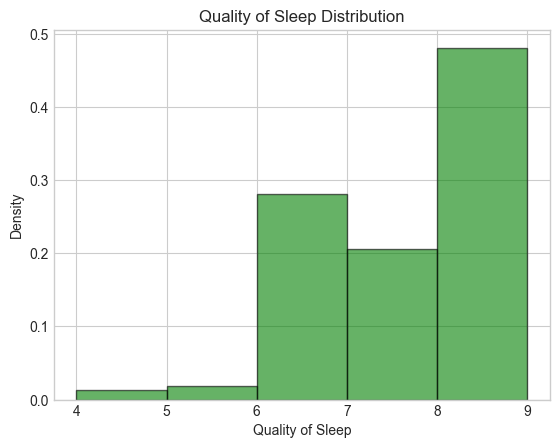

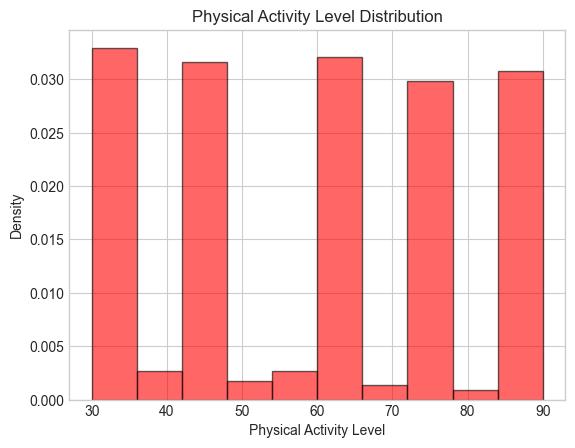

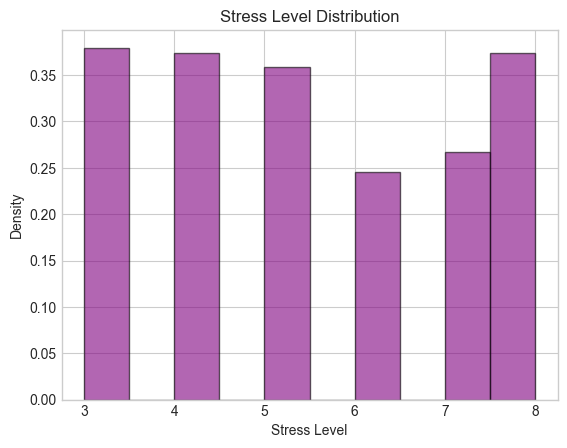

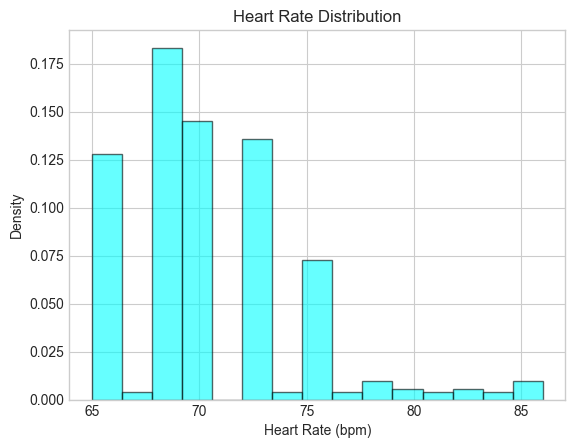

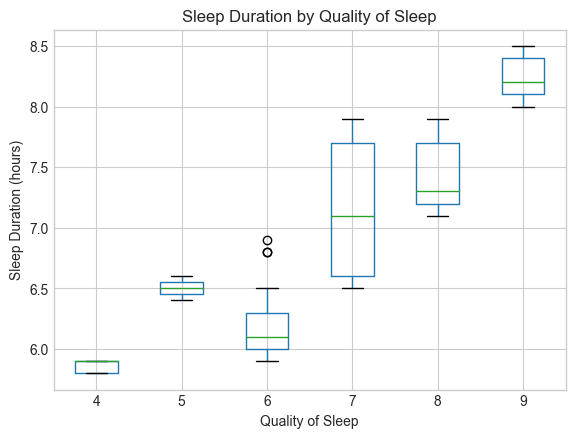

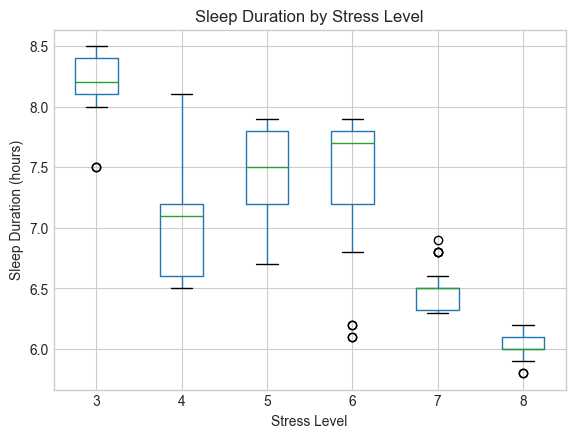

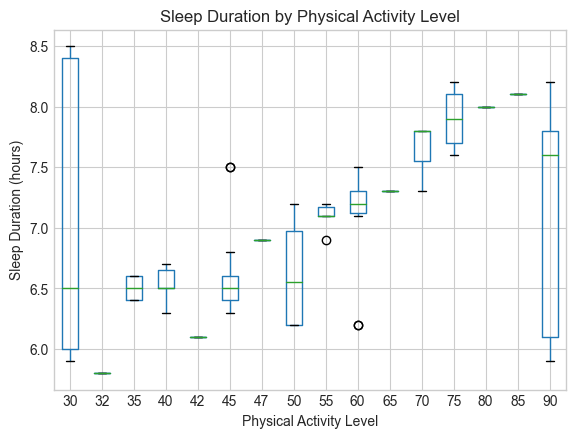

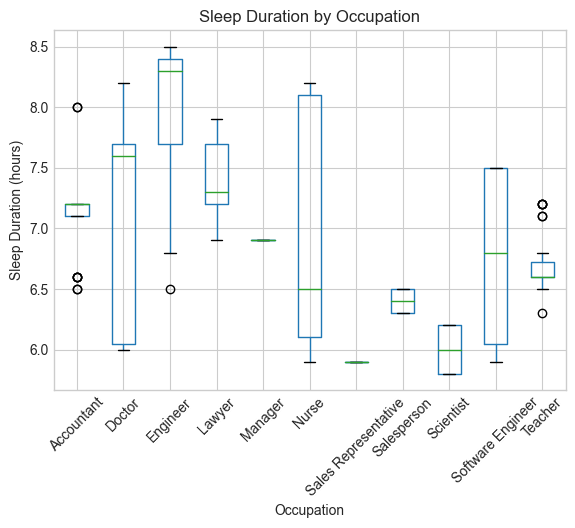

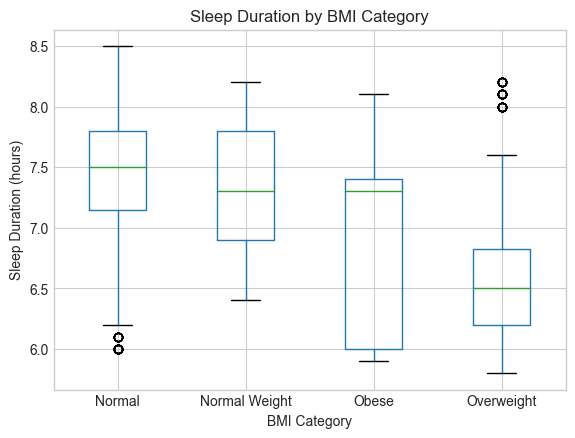

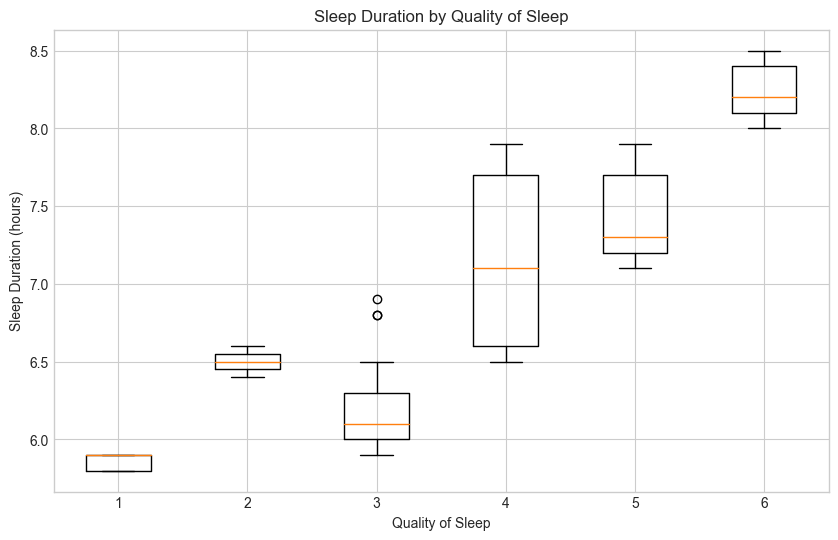

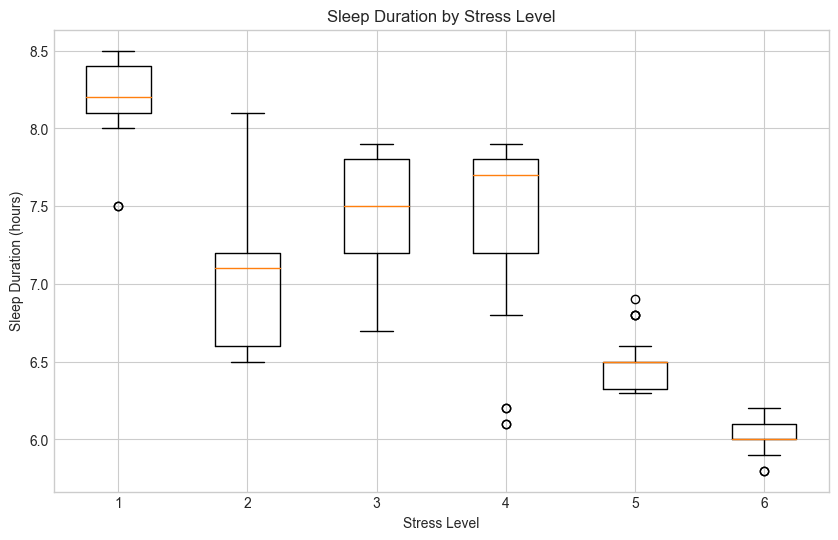

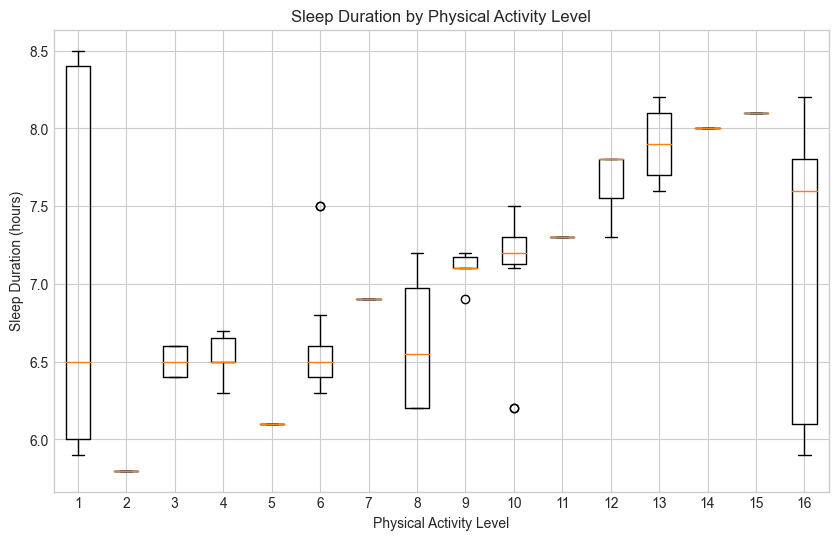

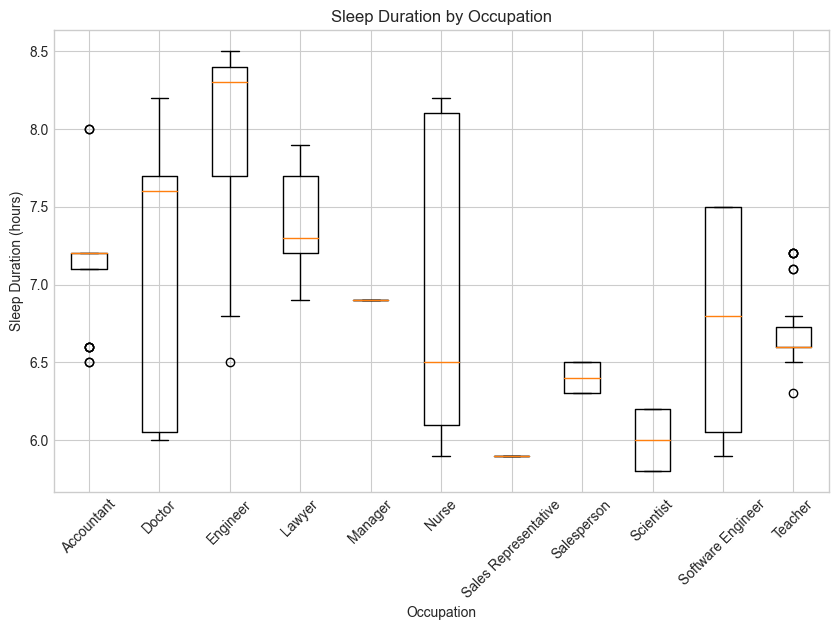

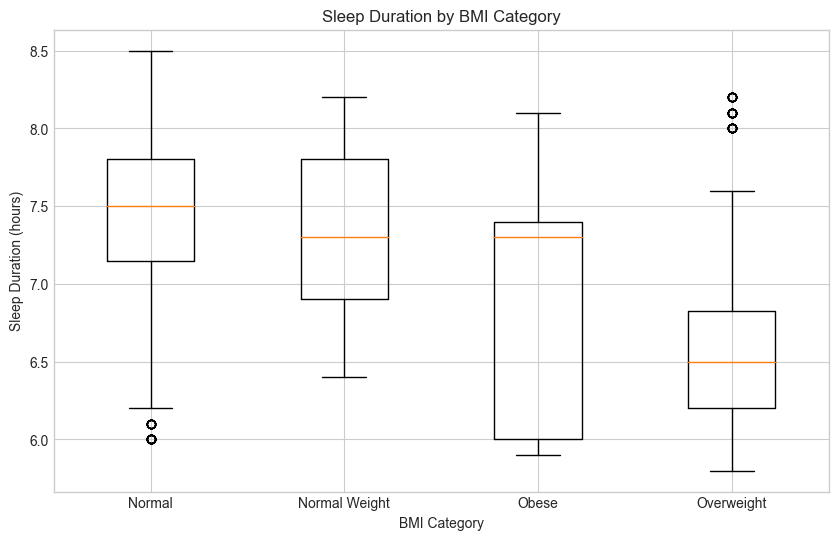

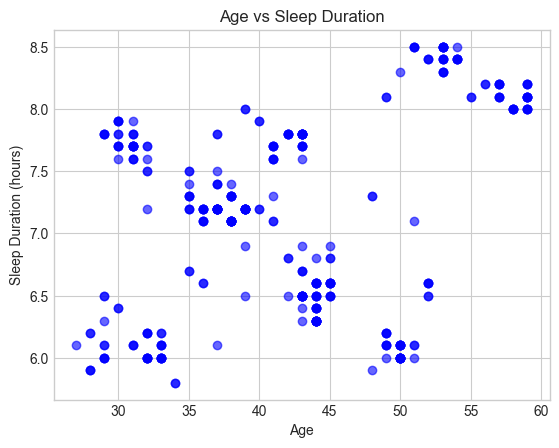

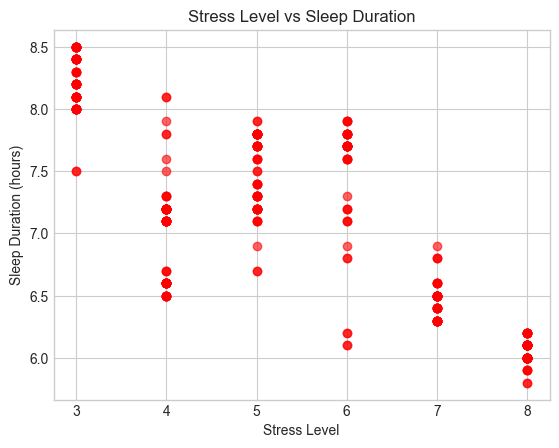

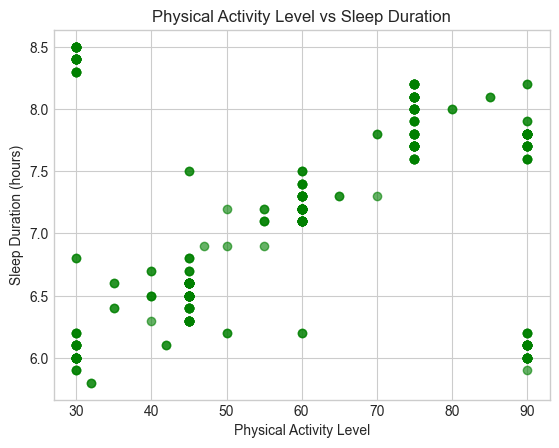

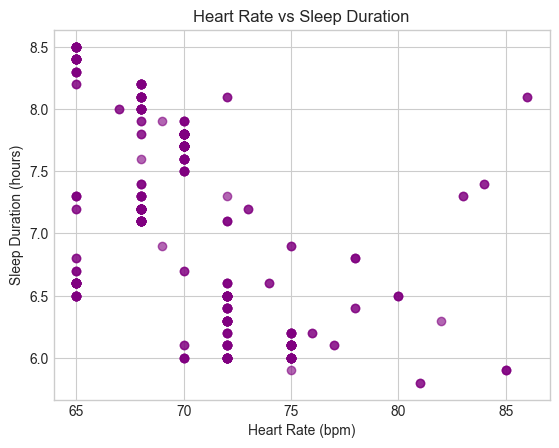

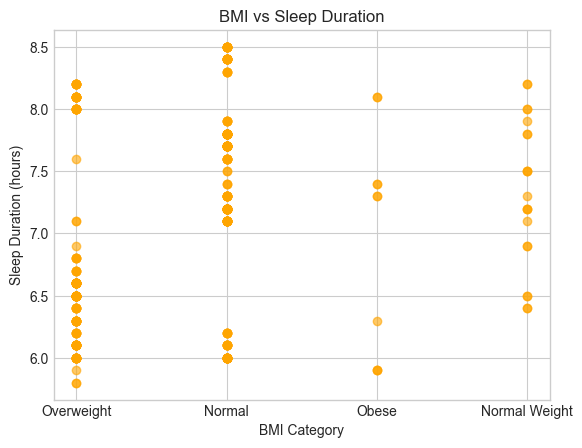

Pandas plotting time: 0.3441 seconds
NumPy plotting time: 0.0848 seconds


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the data from the CSV file
df = pd.read_csv('sleep_health.csv')

# Set up the plotting style
plt.style.use('seaborn-whitegrid')

# Function to plot and time
def plot_with_timing(plot_function):
    start_time = time.perf_counter()
    plot_function()
    return time.perf_counter() - start_time

# 1. Using Pandas for Distribution Plots
# Timing Pandas plotting
pandas_time = 0

# 1.1 Age Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Age'], bins=15, alpha=0.6, color='blue', edgecolor='black'))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Sleep Duration'], bins=15, alpha=0.6, color='orange', edgecolor='black'))
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Quality of Sleep Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Quality of Sleep'], bins=5, alpha=0.6, color='green', edgecolor='black'))
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 1.4 Physical Activity Level Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Physical Activity Level'], bins=10, alpha=0.6, color='red', edgecolor='black'))
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 1.5 Stress Level Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Stress Level'], bins=10, alpha=0.6, color='purple', edgecolor='black'))
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 1.6 Heart Rate Distribution
pandas_time += plot_with_timing(lambda: plt.hist(df['Heart Rate'], bins=15, alpha=0.6, color='cyan', edgecolor='black'))
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# 2. Using NumPy for Distribution Plots
numpy_time = 0

# 2.1 Age Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Age']), bins=15, alpha=0.6, color='blue', edgecolor='black', density=True))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 2.2 Sleep Duration Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Sleep Duration']), bins=15, alpha=0.6, color='orange', edgecolor='black', density=True))
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.show()

# 2.3 Quality of Sleep Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Quality of Sleep']), bins=5, alpha=0.6, color='green', edgecolor='black', density=True))
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Density')
plt.show()

# 2.4 Physical Activity Level Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Physical Activity Level']), bins=10, alpha=0.6, color='red', edgecolor='black', density=True))
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Density')
plt.show()

# 2.5 Stress Level Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Stress Level']), bins=10, alpha=0.6, color='purple', edgecolor='black', density=True))
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Density')
plt.show()

# 2.6 Heart Rate Distribution
numpy_time += plot_with_timing(lambda: plt.hist(np.array(df['Heart Rate']), bins=15, alpha=0.6, color='cyan', edgecolor='black', density=True))
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Density')
plt.show()

# 3. Distribution Plots Based on Categories (Using Pandas)
# 3.1 Sleep Duration based on Quality of Sleep
pandas_time += plot_with_timing(lambda: df.boxplot(column='Sleep Duration', by='Quality of Sleep'))
plt.title('Sleep Duration by Quality of Sleep')
plt.suptitle('')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
pandas_time += plot_with_timing(lambda: df.boxplot(column='Sleep Duration', by='Stress Level'))
plt.title('Sleep Duration by Stress Level')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
pandas_time += plot_with_timing(lambda: df.boxplot(column='Sleep Duration', by='Physical Activity Level'))
plt.title('Sleep Duration by Physical Activity Level')
plt.suptitle('')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
pandas_time += plot_with_timing(lambda: df.boxplot(column='Sleep Duration', by='Occupation'))
plt.title('Sleep Duration by Occupation')
plt.suptitle('')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 3.5 Sleep Duration based on BMI
pandas_time += plot_with_timing(lambda: df.boxplot(column='Sleep Duration', by='BMI Category'))
plt.title('Sleep Duration by BMI Category')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4. Distribution Plots Based on Categories (Using NumPy)
# 4.1 Sleep Duration based on Quality of Sleep
plt.figure(figsize=(10, 6))
data_to_plot = [df['Sleep Duration'][df['Quality of Sleep'] == quality] for quality in np.unique(df['Quality of Sleep'])]
plt.boxplot(data_to_plot, positions=np.arange(1, len(data_to_plot) + 1))
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.2 Sleep Duration based on Stress Level
plt.figure(figsize=(10, 6))
data_to_plot = [df['Sleep Duration'][df['Stress Level'] == stress] for stress in np.unique(df['Stress Level'])]
plt.boxplot(data_to_plot, positions=np.arange(1, len(data_to_plot) + 1))
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.3 Sleep Duration based on Physical Activity Level
plt.figure(figsize=(10, 6))
data_to_plot = [df['Sleep Duration'][df['Physical Activity Level'] == activity] for activity in np.unique(df['Physical Activity Level'])]
plt.boxplot(data_to_plot, positions=np.arange(1, len(data_to_plot) + 1))
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.4 Sleep Duration based on Occupation
plt.figure(figsize=(10, 6))
occupations = np.unique(df['Occupation'])
data_to_plot = [df['Sleep Duration'][df['Occupation'] == occupation] for occupation in occupations]
plt.boxplot(data_to_plot, positions=np.arange(1, len(occupations) + 1))
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(occupations) + 1), labels=occupations, rotation=45)
plt.show()

# 4.5 Sleep Duration based on BMI
plt.figure(figsize=(10, 6))
bmi_categories = np.unique(df['BMI Category'])
data_to_plot = [df['Sleep Duration'][df['BMI Category'] == bmi] for bmi in bmi_categories]
plt.boxplot(data_to_plot, positions=np.arange(1, len(bmi_categories) + 1))
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(bmi_categories) + 1), labels=bmi_categories)
plt.show()

# 5. Relationship Plots (Using Pandas)
# 5.1 Age vs Sleep Duration
pandas_time += plot_with_timing(lambda: plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.6, color='blue'))
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Stress Level vs Sleep Duration
pandas_time += plot_with_timing(lambda: plt.scatter(df['Stress Level'], df['Sleep Duration'], alpha=0.6, color='red'))
plt.title('Stress Level vs Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.3 Physical Activity Level vs Sleep Duration
pandas_time += plot_with_timing(lambda: plt.scatter(df['Physical Activity Level'], df['Sleep Duration'], alpha=0.6, color='green'))
plt.title('Physical Activity Level vs Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.4 Heart Rate vs Sleep Duration
pandas_time += plot_with_timing(lambda: plt.scatter(df['Heart Rate'], df['Sleep Duration'], alpha=0.6, color='purple'))
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.5 BMI vs Sleep Duration
pandas_time += plot_with_timing(lambda: plt.scatter(df['BMI Category'], df['Sleep Duration'], alpha=0.6, color='orange'))
plt.title('BMI vs Sleep Duration')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 输出每种绘图方法所用的总时间
print(f"Pandas plotting time: {pandas_time:.4f} seconds")
print(f"NumPy plotting time: {numpy_time:.4f} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



C:\Users\HP\AppData\Local\Temp\ipykernel_8428\2864186384.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


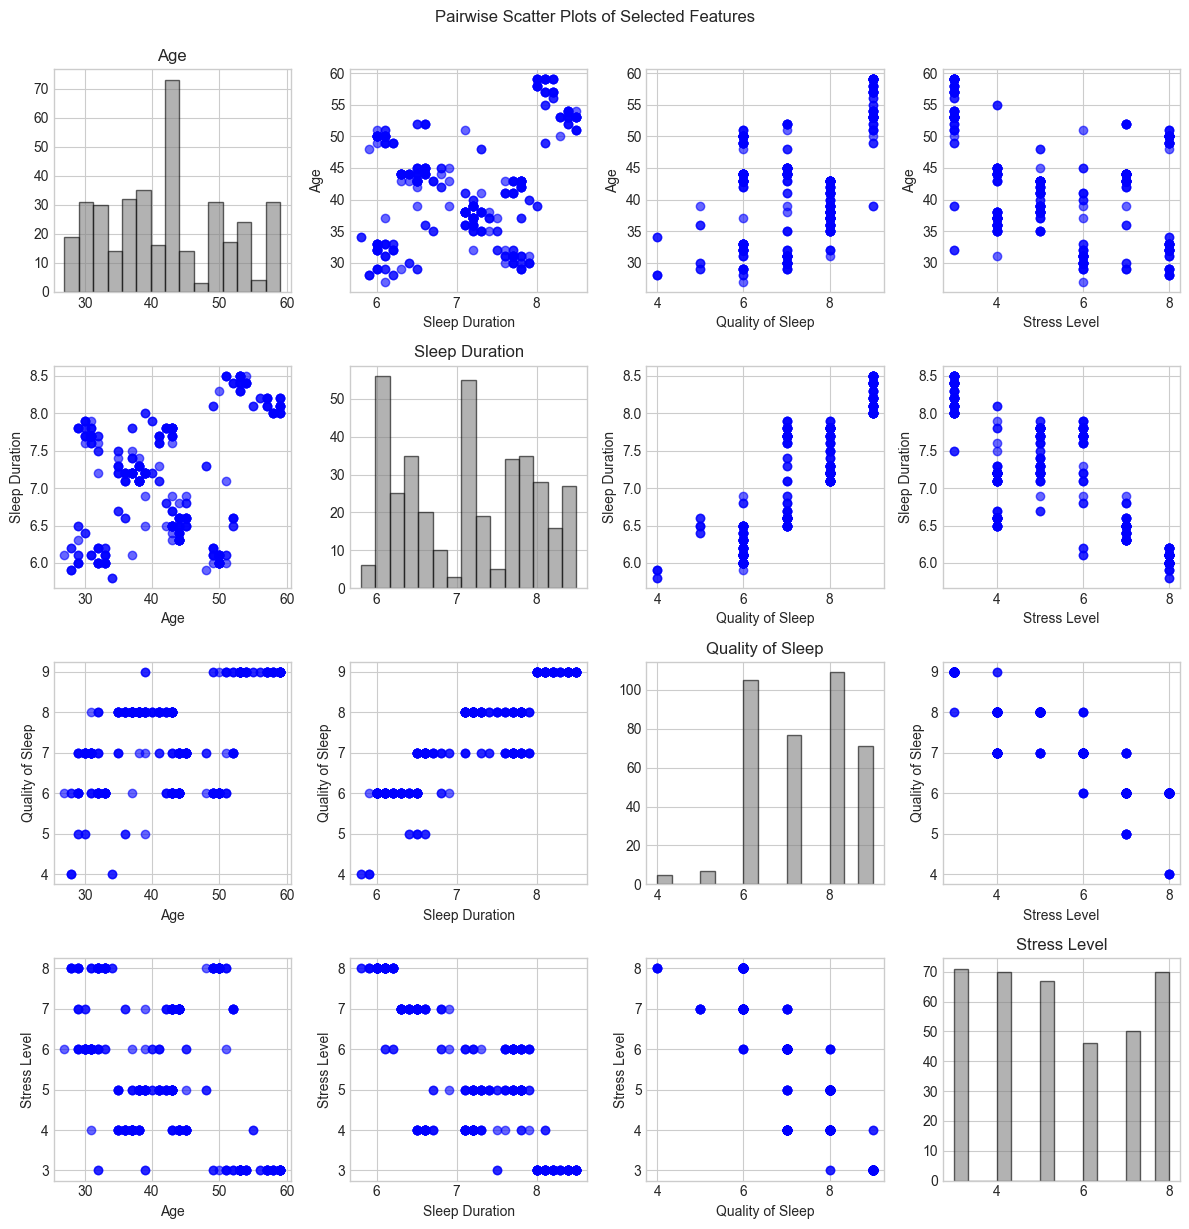

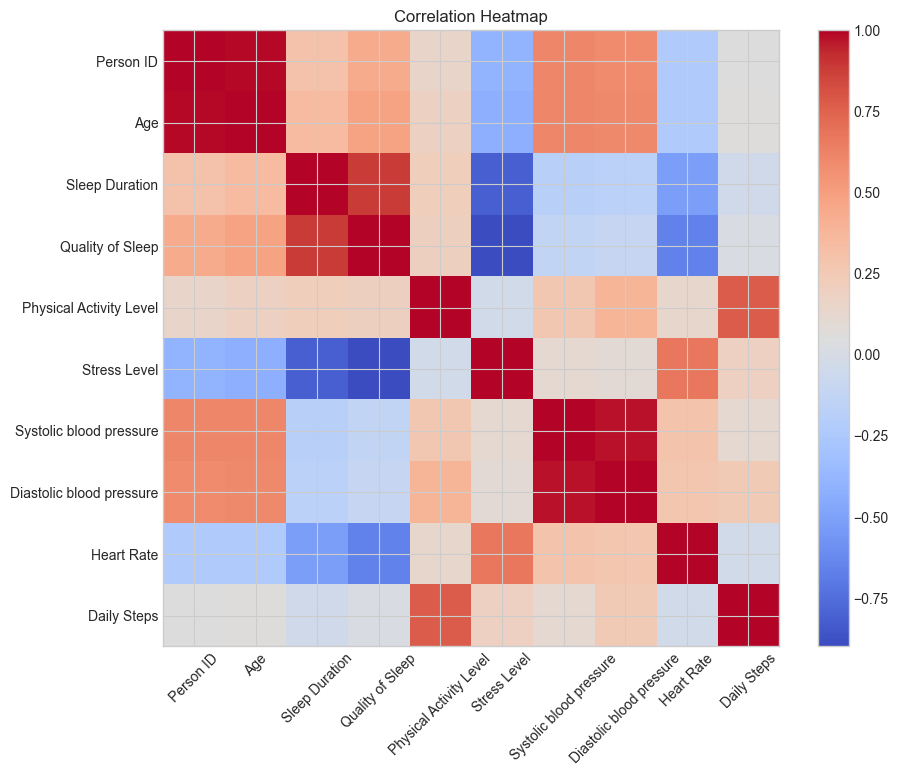

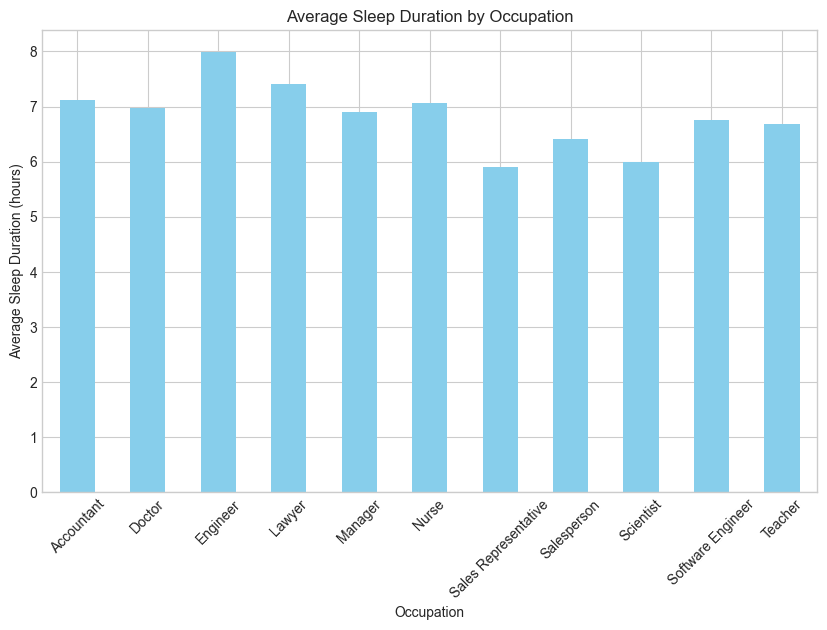

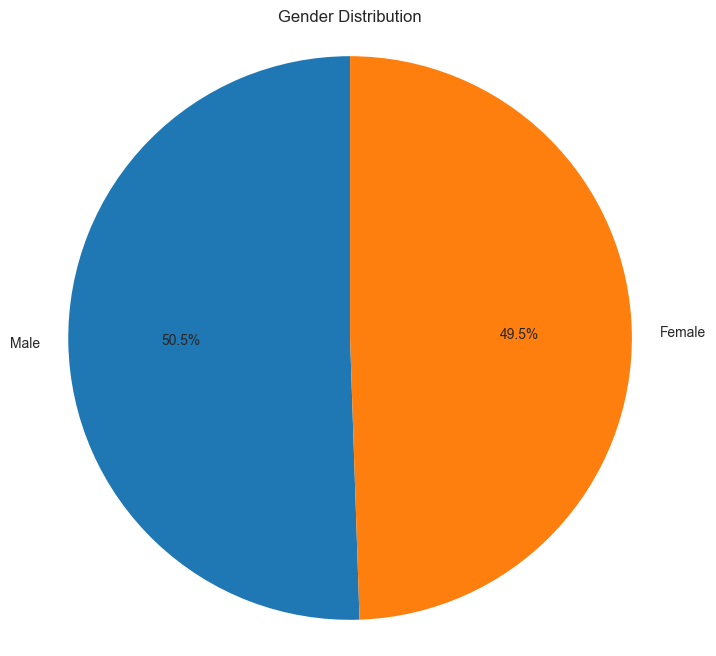

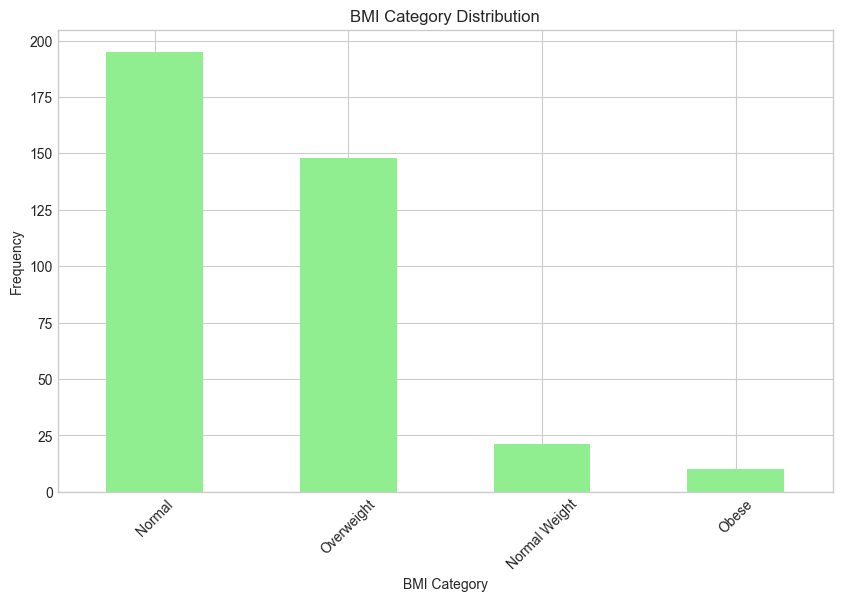

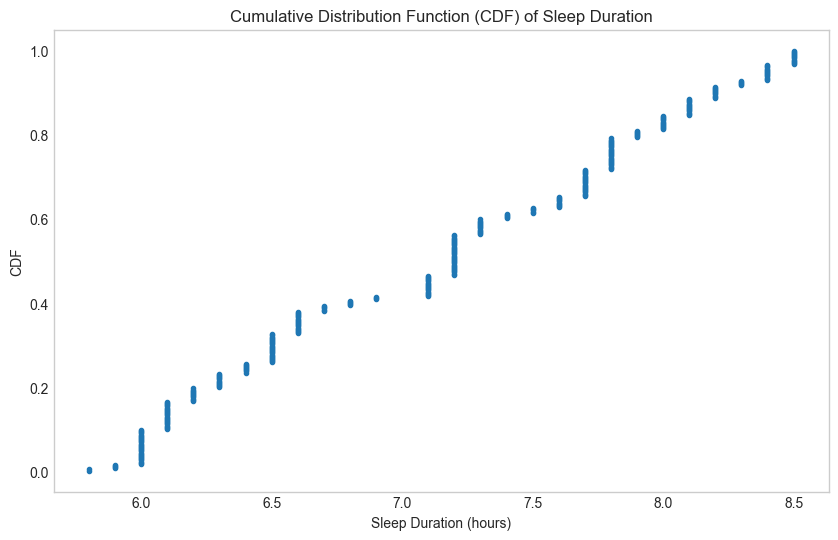

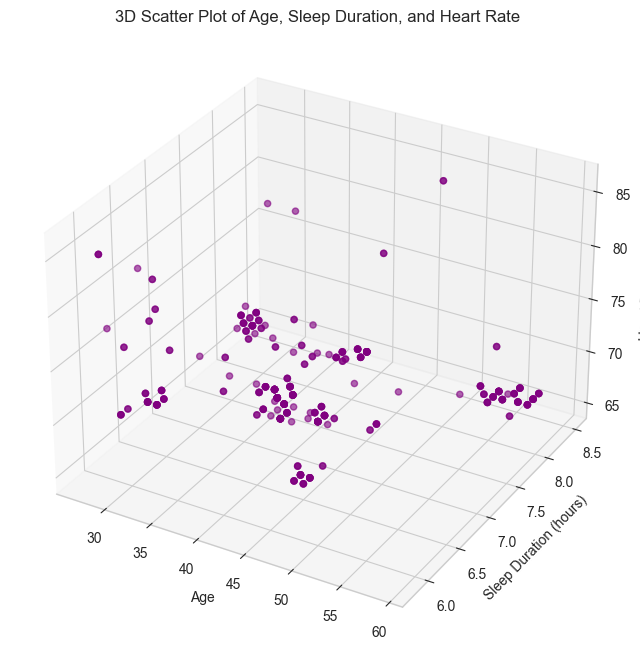

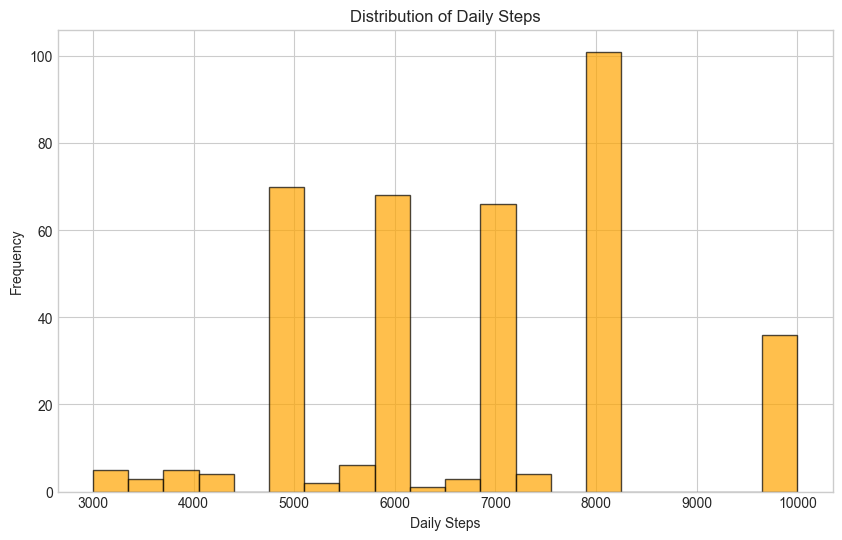

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('sleep_health.csv')

# Set up the plotting style
plt.style.use('seaborn-whitegrid')

# 1. Pairwise Scatter Plots
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']
n = len(features)

plt.figure(figsize=(12, 12))
for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i * n + j + 1)
        if i == j:
            plt.hist(df[features[i]], bins=15, alpha=0.6, color='gray', edgecolor='black')
            plt.title(features[i])
        else:
            plt.scatter(df[features[j]], df[features[i]], alpha=0.6, color='blue')
            plt.xlabel(features[j])
            plt.ylabel(features[i])
plt.tight_layout()
plt.suptitle('Pairwise Scatter Plots of Selected Features', y=1.02)
plt.show()

# 2. Correlation Heatmap using Pandas
correlation = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()

# 3. Bar Plot for Average Sleep Duration by Occupation using Pandas
average_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean()
plt.figure(figsize=(10, 6))
average_sleep_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 4. Pie Chart for Gender Distribution using Pandas
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 5. Histogram of BMI Categories using Pandas
plt.figure(figsize=(10, 6))
df['BMI Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 6. Cumulative Distribution Function (CDF) for Sleep Duration using Pandas
plt.figure(figsize=(10, 6))
sorted_values = np.sort(df['Sleep Duration'])
y_values = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
plt.plot(sorted_values, y_values, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('CDF')
plt.grid()
plt.show()

# 7. 3D Scatter Plot using Matplotlib (for Age, Sleep Duration, and Heart Rate)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Sleep Duration'], df['Heart Rate'], alpha=0.6, color='purple')
ax.set_title('3D Scatter Plot of Age, Sleep Duration, and Heart Rate')
ax.set_xlabel('Age')
ax.set_ylabel('Sleep Duration (hours)')
ax.set_zlabel('Heart Rate (bpm)')
plt.show()

# 8. Distribution Plot of Daily Steps using NumPy
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Steps'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()
